<a href="https://colab.research.google.com/github/MariaG0205/ModeladoySimulacion/blob/main/Dop853.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Runge-kutta eight Grade Rk8**

In [ ]:
%matplotlib inline
import numpy as np               # Numerical Python
import matplotlib.pyplot as plt  # Graph and Plot handling
import time                      # Time Measure
from scipy.integrate import solve_ivp
import pandas as pd

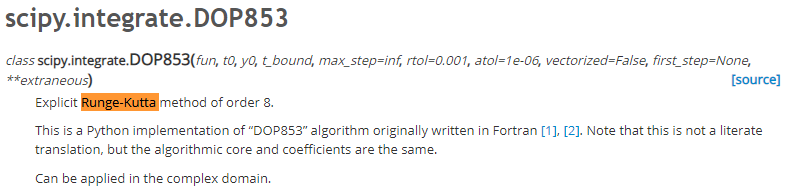

In [ ]:
t0=0.0
tN=10.0
N=15
t=np.linspace(t0,tN,N)
x_8RK=np.zeros(N) ## Runge-Kutta
h=(tN-t0)/N

x_8RK[0]=0
x_Eu=np.zeros(N) ## Euler

x_Eu[0] = 0
for n in range(0,N-1):
    x_Eu[n+1] = x_Eu[n] + h * (np.cos(x_Eu[n]) + np.sin(t[n]))
x_imp = np.zeros(N) 
for n in range(0,N-1):
    x_imp[n+1] = x_imp[n] + h * ( np.cos(x_imp[n]+(h/2.0)*(np.cos(x_imp[n]) + np.sin(t[n]))) + np.sin(t[n]+h/2.0)  )


\begin{align*}
k_1 &=  g(x_n, t_n) \\[1.0em]
k_2 &= h\cdot g(x_n + a_{2,1}k_1                                   , t+c_2  ) \\[1.0em]
k_3 &= h\cdot g(x_n + a_{3,1}k_1 + a_{3,2}k_2                      , t+c_3  ) \\[1.0em]
k_4 &= h\cdot g(x_n + a_{4,1}k_1 + a_{4,2}k_2 + a_{4,3}k_3         , t+c_4  ) \\[1.0em]
k_5 &= h\cdot g(x_n + a_{5,1}k_1 + a_{5,2}k_2 + a_{5,3}k_3 +a_{5,4}k_4         , t+c_5  ) \\[1.0em]
k_6 &= h\cdot g(x_n + a_{6,1}k_1 + a_{6,2}k_2 + a_{6,3}k_3+ a_{6,4}k_4+ a_{6,5}k_5         , t+c_6  ) \\[1.0em]
k_7 &= h\cdot g(x_n + a_{7,1}k_1 + a_{7,2}k_2 + a_{7,3}k_3+ a_{7,4}k_4+ a_{7,5}k_5+ a_{7,6}k_6         , t+c_7  ) \\[1.0em]
k_8 &= h\cdot g(x_n + a_{8,1}k_1 + a_{8,2}k_2 + a_{8,3}k_3+ a_{8,4}k_4+ a_{8,5}k_5+ a_{8,6}k_6+ a_{8,7}k_7         , t+c_8  ) \\[1.0em]
    &\qquad \vdots   \\[1.0em]
k_q &= h\cdot g(x_n + [a_{q,1} k_1 + a_{q,2}k_2+\ldots+a_{q,q-1}k_{q-1}], t_n + c_q  )
\end{align*}

Such that,

\begin{equation*}
x_{n+1} = x_n + \sum_{i=1}^{q} b_i k_i
\end{equation*}

The scheme as introduced now in its general form, has some undefined coefficients: $a_{i,j}$, $b_{i}$ and $c_{i}$. The elements $a_{i,j}$ are denoted as the Runge-Kutta Matrix, while $b_i$ are weights and $c_i$ are nodes. Deriving these (and coefficients for other similar methods) can be a tedious task of complicated algebra. Hence, such coefficients are usually obtained from tables in litterature. The Runge-Kutta methods' coefficients can be found using the (John C.) Butcher tableau,

\begin{array}{ c|c c c c c c c}
  0   &         &&              &&& \\
  c_2 & a_{2,1} &&              &&& \\
  c_3 & a_{3,1} && a_{3,2} &&& \\
  c_4 & a_{4,1} && a_{4,2}&& a_{4,3} &&& \\
  c_5 & a_{5,1} && a_{5,2}&& a_{5,3}&& a_{5,4} &&& \\
  c_6 & a_{6,1} && a_{6,2}&& a_{6,3}&& a_{6,4}&& a_{6,5} &&& \\
  c_7 & a_{7,1} && a_{7,2}&& a_{7,3}&& a_{7,4}&& a_{7,5}&& a_{7,6} &&& \\
  c_8 & a_{8,1} && a_{8,2}&& a_{8,3}&& a_{8,4}&& a_{8,5}&& a_{8,6}&& a_{8,7} &&& \\
  \hline
      & b_1     && b_2     && b_3 && b_4&&b_5&&b_6 && b_7&&b_8
\end{array}

The coefficients are then determined by demanding the method to be <i>consistent</i>. Consistancy of a numerical (finite difference) approximation referes to the fact that the approximated problem (equation) approaches the exact problem in the limit of the step size going towards zero. For the Runge-Kutta method, this happens to be the case when

\begin{equation*}
\sum_{j=1}^{l-1} a_{i,j} = c_i, \text{  for  } l\in 2,3,\ldots,q;
\end{equation*}

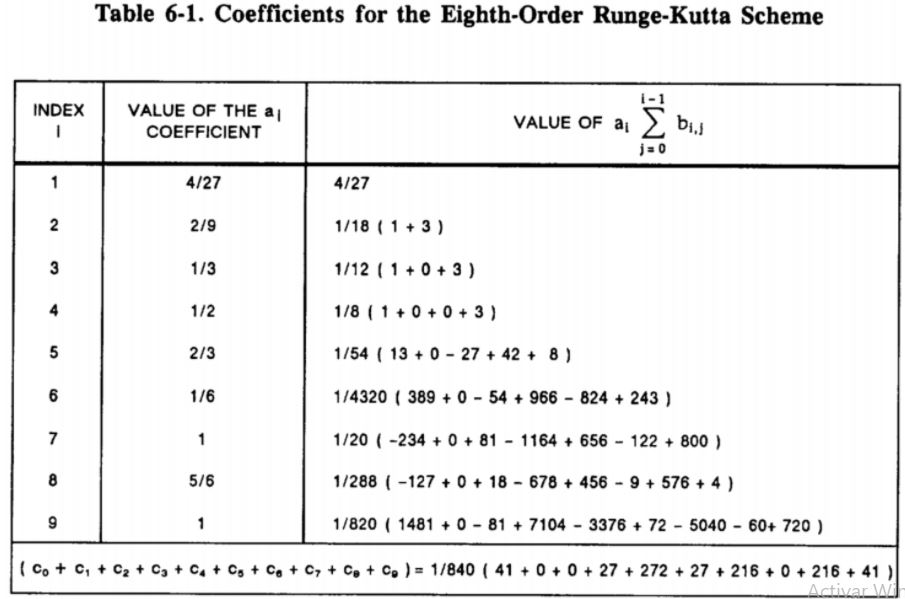

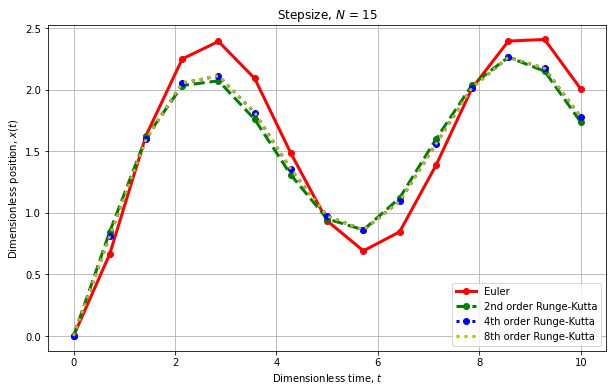

In [ ]:
def g(x_,t_):
    return np.cos(x_) + np.sin(t_)
x_4RK = np.zeros(N) ## Runge-Kutta4   
for n in range(0,N-1):
    k1 = h*g( x_4RK[n]       , t[n]         )
    k2 = h*g( x_4RK[n] + k1/2, t[n] + (h/2) ) 
    k3 = h*g( x_4RK[n] + k2/2, t[n] + (h/2) ) 
    k4 = h*g( x_4RK[n] + k3  , t[n] +  h    )
    
    x_4RK[n+1] = x_4RK[n] + k1/6 + k2/3 + k3/3 + k4/6
for n in range(0,N-1):
    k1=g(x_8RK[n],t[n])
    k2=g(x_8RK[n]+(h*4/27)*k1,t[n]+(h*(4/27))) 
    k3=g(x_8RK[n]+(h/18)*(k1+(3*k2)),t[n]+(h*(2/9))) 
    k4=g(x_8RK[n]+(h/12)*(k1+(3*k3)),t[n]+(h*(1/3)))
    k5=g(x_8RK[n]+(h/8)*(k1+(3*k4)),t[n]+(h*(1/2)))
    k6=g(x_8RK[n]+(h/54)*((13*k1)-(27*k3)+(42*k4)+(8*k5 )),t[n]+(h*(2/3)))
    k7=g(x_8RK[n]+(h/4320)*((389*k1)-(54*k3)+(966*k4)-(824*k5)+(243*k6)),t[n]+(h*(1/6)))
    k8=g(x_8RK[n]+(h/20)*((-234*k1)+(81*k3)-(1164*k4)+(656*k5)-(122*k6)+(800*k7)),t[n]+h)
    k9=g(x_8RK[n]+(h/288)*((-127*k1)+(18*k3)-(678*k4)+(456*k5)-(9*k6)+(576*k7)+(4*k8)),t[n]+(h*(5/6)))
    k10=g(x_8RK[n]+(h/820)*((1481*k1)-(81*k3)+(7104*k4)-(3376*k5)+(72*k6)-(5040*k7)-(60*k8)+(720*k9)),t[n]+h)
    
    x_8RK[n+1] = x_8RK[n] + (h/840)*(k1*41 + 27*k4 +272*k5+216*k7 +27*k6+216*k9+41*k10)
plt.figure(figsize=(10,6))
plt.plot(t,x_Eu, '-ro' , linewidth=3.0,label=r'Euler')
plt.plot(t,x_imp,'--go', linewidth=3.0,label=r'2nd order Runge-Kutta')
plt.plot(t,x_4RK,':bo' , linewidth=3.0,label=r'4th order Runge-Kutta')
plt.plot(t,x_8RK,':y' , linewidth=3.0,label=r'8th order Runge-Kutta')
plt.ylabel(r'Dimensionless position, $x(t)$')
plt.xlabel(r'Dimensionless time, $t$')
plt.title(r'Stepsize, $N$ = %i' % N)
plt.legend(loc=4) 
plt.grid()
plt.show()

# **DOP853**

## teory

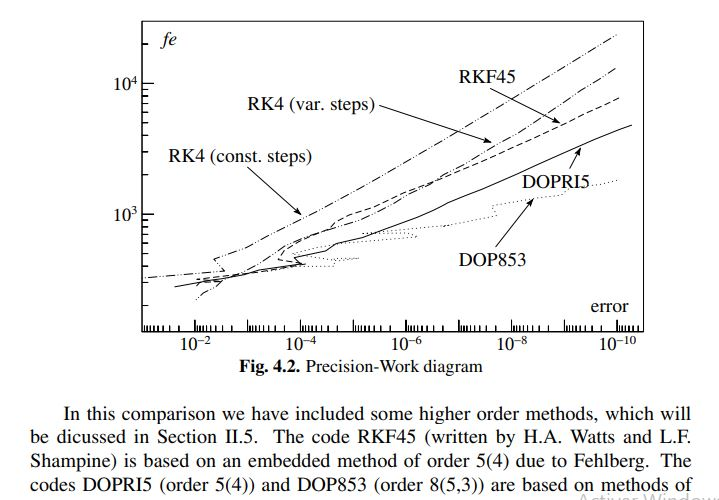

 DOrman & pircing methods (Runge-kutta High Grade)
This section describes the construction of Runge-Kutta methods of higher orders,
particularly of orders p = 5 and p = 8. As can be seen from Table 2.3, the complexity and number of the order conditions to be solved increases rapidly with p.
An increasingly skilful use of simplifying assumptions will be the main tool for
this task.

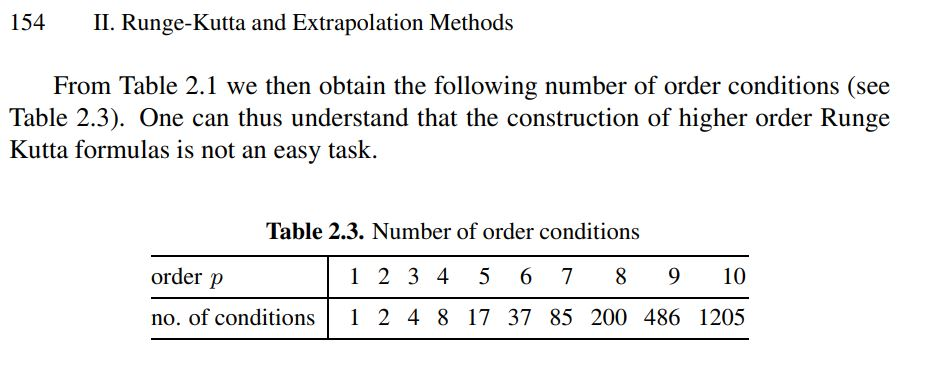

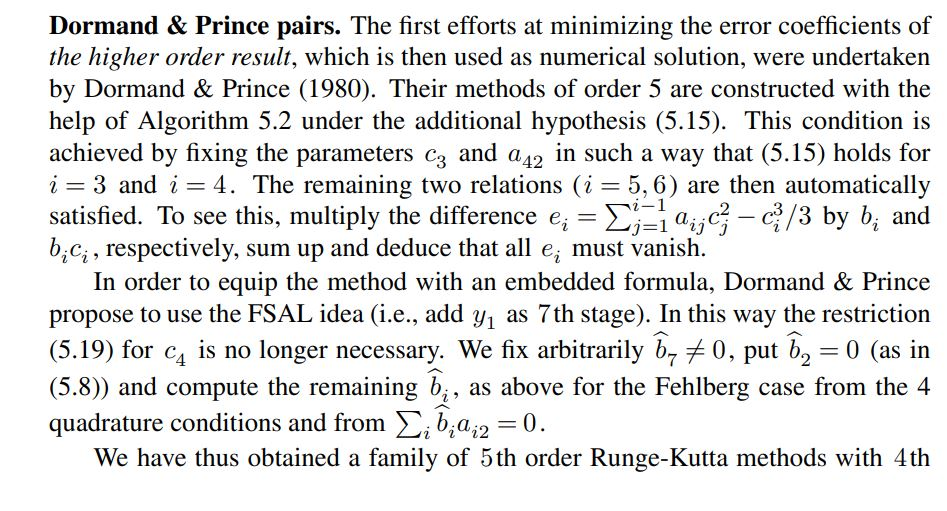

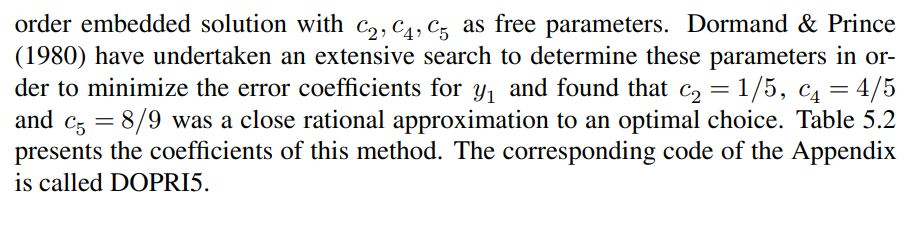

for order eight we have s=p+2 stages so we have at least 10 stages 

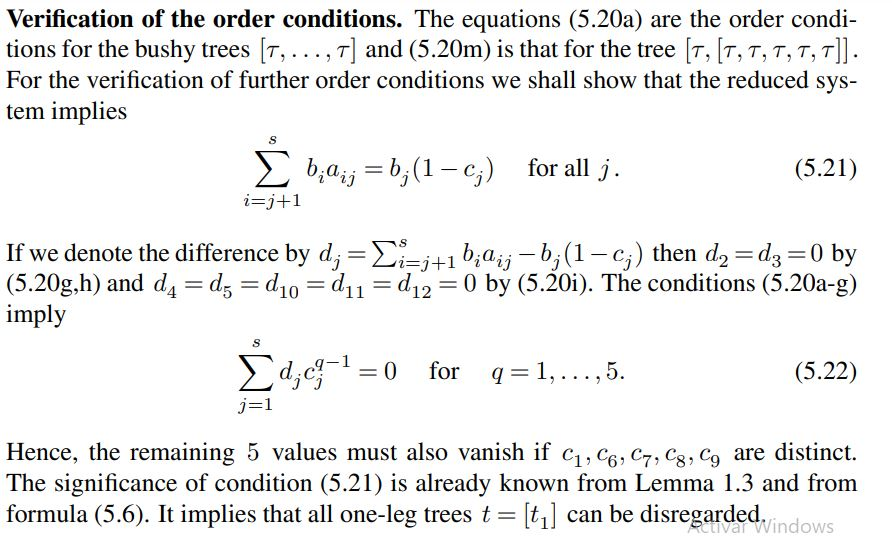

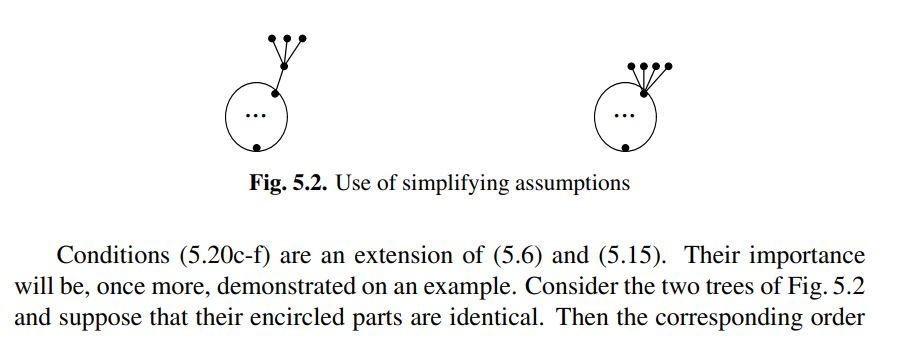

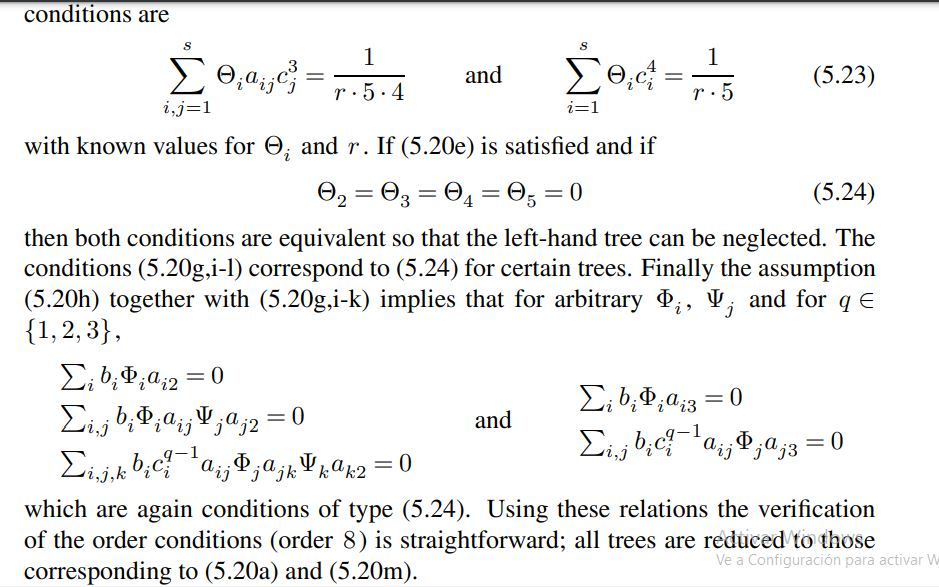

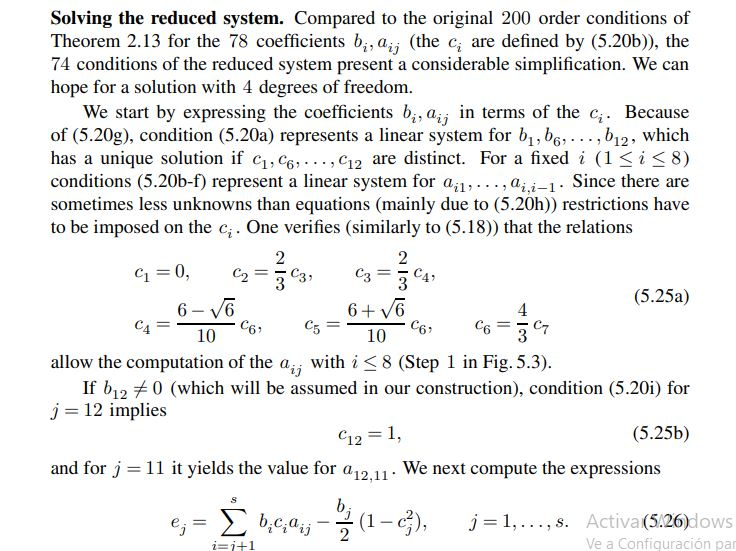

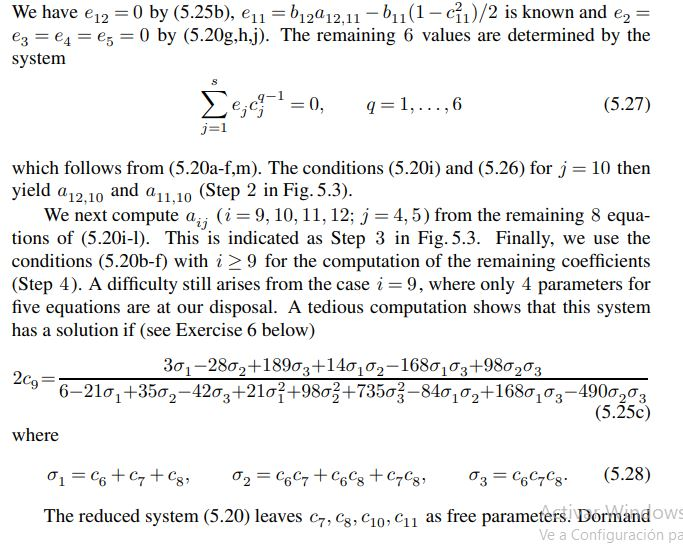

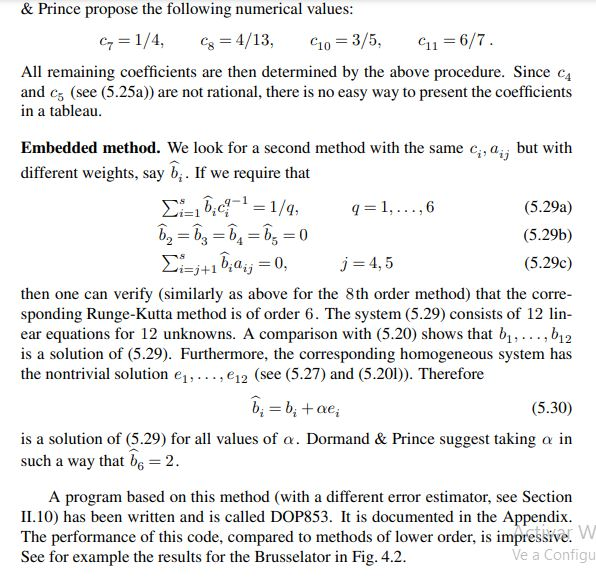

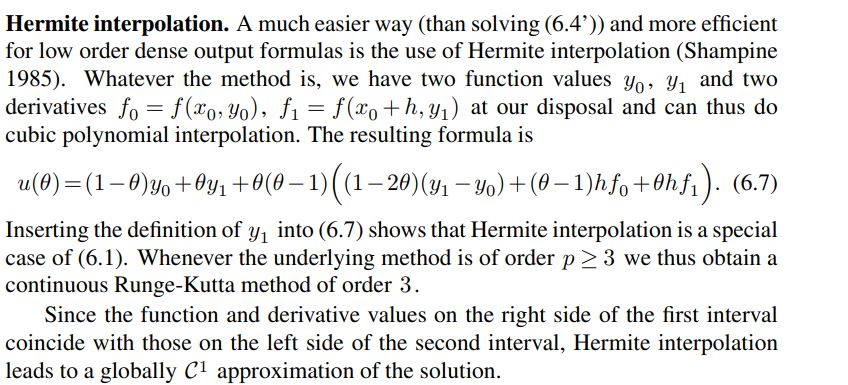

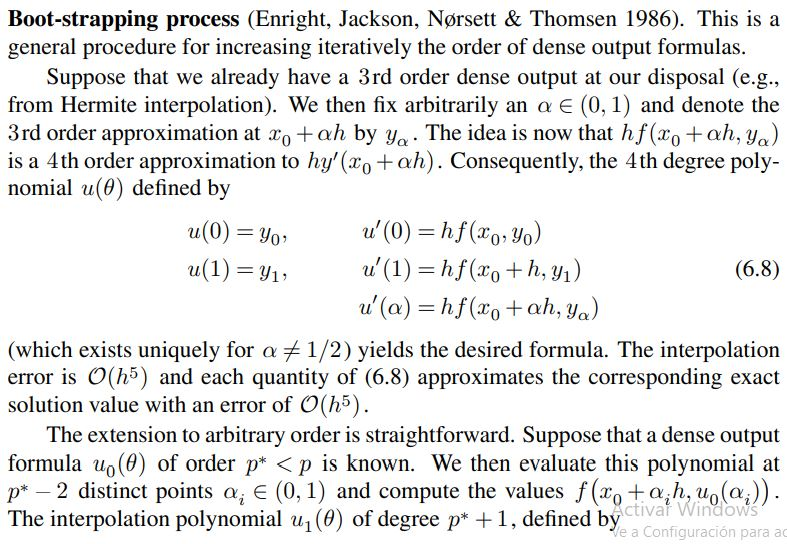

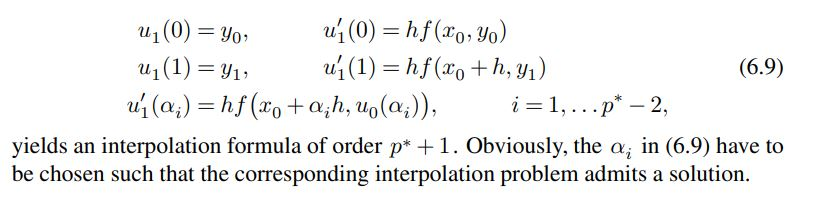

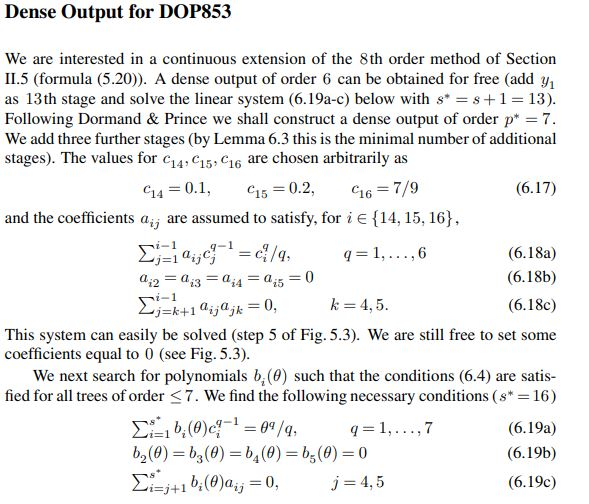

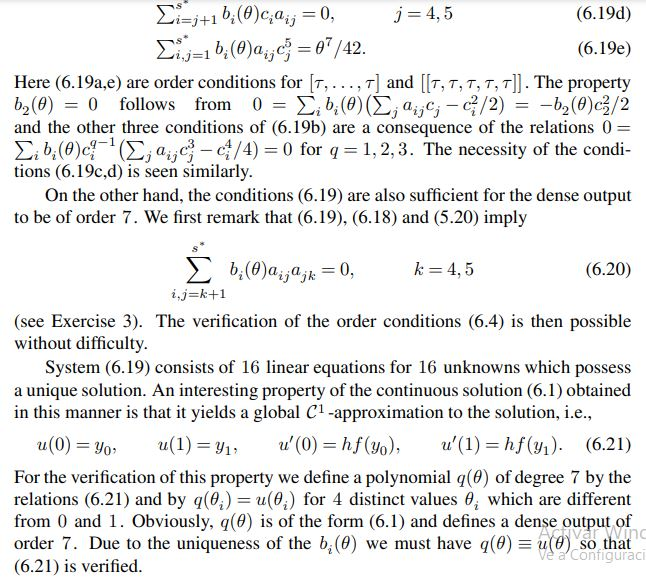

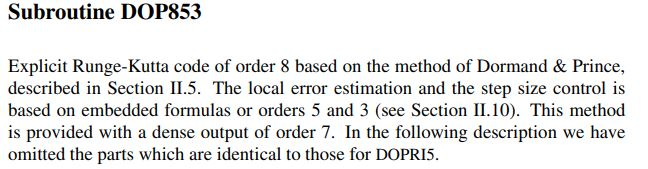

## implemetation the sol_ivp with DOP method

                                sol_ivp flow of work
1. first step that is made is event validation is in rgument is not the algoritm find events based on de fun (y) by the equation event(t,y(t))=o this is made by the scipy.optimize.brentq funcion
2. if the validation of the events is correct the algorithm next step is the validation of the method and if it is correrc it create a solver called the funcion method=(fun,t0,y0,tf) and looks for the denseoutput 
(in this case the method is DOP853 that is discuss folowing this secction)
3. if there is dense output the algorithm validate the events again 
4. if there is dense output the algorithm calculate a new solution based in the output of the solver interpolating it by the funcion ODEsolutions
5. finally the algorith returns the solution of the oderesult of the past solution
 
                        DOP853 subroutine workflow
scipy implements this method as a class 'dop853' tha heritate the caracteristics of all the runge kutta methods but whit diferent error, norm error and dense output calculation
the folowing workflow shows its procedure 
1. the first step is import all the coeficients needed for the method and we can see that it takes 16 stages for the solution 
2. then the method implementate its error and norm error based of its error coeficients and the dense output as well wich is calculate by aplay the rungekutta ecuations til the stage 16 after this the algorithm define the constants needed for the interpolation ecuation and then it do the interpolation based of those coeficients 
so we can conclude that DOP853 is a eigh grade runge-kutta method because its coeficients suply this order conditions and it has an error based on oreder 5 and order 3 error coeficients, and the dense output its of order 7 by aplaing the interpolation error of order 3 and 5 that process is called bootstrap


                           odesolution workflow

It is organized as a collection of DenseOutput objects which represent local interpolants. It provides an algorithm to select a right interpolant for each given point.
The interpolants cover the range between `t_min` and `t_max` . Evaluation outside this interval is not forbidden, but the accuracy is not guaranteed. When evaluating at a breakpoint (one of the values in `ts`) a segment with the lower index is selected.


                          oderesult workflow
calculates the optimizacion of the result

In [ ]:
import numpy as np 
def check_arguments(fun, y0, support_complex):
    y0 = np.asarray(y0)
    if np.issubdtype(y0.dtype, np.complexfloating):
        if not support_complex:
            raise ValueError("`y0` is complex, but the chosen solver does "
                             "not support integration in a complex domain.")
        dtype = complex
    else:
        dtype = float
    y0 = y0.astype(dtype, copy=False)

    if y0.ndim != 1:
        raise ValueError("`y0` must be 1-dimensional.")

    def fun_wrapped(t, y):
        return np.asarray(fun(t, y), dtype=dtype)

    return fun_wrapped, y0


class OdeSolver(object):
    TOO_SMALL_STEP = "Required step size is less than spacing between numbers."

    def __init__(self, fun, t0, y0, t_bound, vectorized,
                 support_complex=False):
        self.t_old = None
        self.t = t0
        self._fun, self.y = check_arguments(fun, y0, support_complex)
        self.t_bound = t_bound
        self.vectorized = vectorized

        if vectorized:
            def fun_single(t, y):
                return self._fun(t, y[:, None]).ravel()
            fun_vectorized = self._fun
        else:
            fun_single = self._fun

            def fun_vectorized(t, y):
                f = np.empty_like(y)
                for i, yi in enumerate(y.T):
                    f[:, i] = self._fun(t, yi)
                return f

        def fun(t, y):
            self.nfev += 1
            return self.fun_single(t, y)

        self.fun = fun
        self.fun_single = fun_single
        self.fun_vectorized = fun_vectorized

        self.direction = np.sign(t_bound - t0) if t_bound != t0 else 1
        self.n = self.y.size
        self.status = 'running'

        self.nfev = 0
        self.njev = 0
        self.nlu = 0

    @property
    def step_size(self):
        if self.t_old is None:
            return None
        else:
            return np.abs(self.t - self.t_old)

    def step(self):
        if self.status != 'running':
            raise RuntimeError("Attempt to step on a failed or finished "
                               "solver.")

        if self.n == 0 or self.t == self.t_bound:
            # Handle corner cases of empty solver or no integration.
            self.t_old = self.t
            self.t = self.t_bound
            message = None
            self.status = 'finished'
        else:
            t = self.t
            success, message = self._step_impl()

            if not success:
                self.status = 'failed'
            else:
                self.t_old = t
                if self.direction * (self.t - self.t_bound) >= 0:
                    self.status = 'finished'

        return message

    def dense_output(self):
        if self.t_old is None:
            raise RuntimeError("Dense output is available after a successful "
                               "step was made.")

        if self.n == 0 or self.t == self.t_old:
            # Handle corner cases of empty solver and no integration.
            return ConstantDenseOutput(self.t_old, self.t, self.y)
        else:
            return self._dense_output_impl()

    def _step_impl(self):
        raise NotImplementedError

    def _dense_output_impl(self):
        raise NotImplementedError


class DenseOutput(object):
    
    def __init__(self, t_old, t):
        self.t_old = t_old
        self.t = t
        self.t_min = min(t, t_old)
        self.t_max = max(t, t_old)

    def __call__(self, t):
        t = np.asarray(t)
        if t.ndim > 1:
            raise ValueError("`t` must be a float or a 1-D array.")
        return self._call_impl(t)

    def _call_impl(self, t):
        raise NotImplementedError


class ConstantDenseOutput(DenseOutput):
    
    def __init__(self, t_old, t, value):
        super(ConstantDenseOutput, self).__init__(t_old, t)
        self.value = value

    def _call_impl(self, t):
        if t.ndim == 0:
            return self.value
        else:
            ret = np.empty((self.value.shape[0], t.shape[0]))
            ret[:] = self.value[:, None]
            return ret


In [ ]:
from itertools import groupby
from warnings import warn
import numpy as np
from scipy.sparse import find, coo_matrix


EPS = np.finfo(float).eps


def validate_first_step(first_step, t0, t_bound):
    """Assert that first_step is valid and return it."""
    if first_step <= 0:
        raise ValueError("`first_step` must be positive.")
    if first_step > np.abs(t_bound - t0):
        raise ValueError("`first_step` exceeds bounds.")
    return first_step


def validate_max_step(max_step):
    """Assert that max_Step is valid and return it."""
    if max_step <= 0:
        raise ValueError("`max_step` must be positive.")
    return max_step


def warn_extraneous(extraneous):
    if extraneous:
        warn("The following arguments have no effect for a chosen solver: {}."
             .format(", ".join("`{}`".format(x) for x in extraneous)))


def validate_tol(rtol, atol, n):
    """Validate tolerance values."""
    if rtol < 100 * EPS:
        warn("`rtol` is too low, setting to {}".format(100 * EPS))
        rtol = 100 * EPS

    atol = np.asarray(atol)
    if atol.ndim > 0 and atol.shape != (n,):
        raise ValueError("`atol` has wrong shape.")

    if np.any(atol < 0):
        raise ValueError("`atol` must be positive.")

    return rtol, atol


def norm(x):
    return np.linalg.norm(x) / x.size ** 0.5


def select_initial_step(fun, t0, y0, f0, direction, order, rtol, atol):
    
    if y0.size == 0:
        return np.inf

    scale = atol + np.abs(y0) * rtol
    d0 = norm(y0 / scale)
    d1 = norm(f0 / scale)
    if d0 < 1e-5 or d1 < 1e-5:
        h0 = 1e-6
    else:
        h0 = 0.01 * d0 / d1

    y1 = y0 + h0 * direction * f0
    f1 = fun(t0 + h0 * direction, y1)
    d2 = norm((f1 - f0) / scale) / h0

    if d1 <= 1e-15 and d2 <= 1e-15:
        h1 = max(1e-6, h0 * 1e-3)
    else:
        h1 = (0.01 / max(d1, d2)) ** (1 / (order + 1))

    return min(100 * h0, h1)


class OdeSolution(object):
    
    def __init__(self, ts, interpolants):
        ts = np.asarray(ts)
        d = np.diff(ts)
        # The first case covers integration on zero segment.
        if not ((ts.size == 2 and ts[0] == ts[-1])
                or np.all(d > 0) or np.all(d < 0)):
            raise ValueError("`ts` must be strictly increasing or decreasing.")

        self.n_segments = len(interpolants)
        if ts.shape != (self.n_segments + 1,):
            raise ValueError("Numbers of time stamps and interpolants "
                             "don't match.")

        self.ts = ts
        self.interpolants = interpolants
        if ts[-1] >= ts[0]:
            self.t_min = ts[0]
            self.t_max = ts[-1]
            self.ascending = True
            self.ts_sorted = ts
        else:
            self.t_min = ts[-1]
            self.t_max = ts[0]
            self.ascending = False
            self.ts_sorted = ts[::-1]

    def _call_single(self, t):
        # Here we preserve a certain symmetry that when t is in self.ts,
        # then we prioritize a segment with a lower index.
        if self.ascending:
            ind = np.searchsorted(self.ts_sorted, t, side='left')
        else:
            ind = np.searchsorted(self.ts_sorted, t, side='right')

        segment = min(max(ind - 1, 0), self.n_segments - 1)
        if not self.ascending:
            segment = self.n_segments - 1 - segment

        return self.interpolants[segment](t)

    def __call__(self, t):
     
        t = np.asarray(t)

        if t.ndim == 0:
            return self._call_single(t)

        order = np.argsort(t)
        reverse = np.empty_like(order)
        reverse[order] = np.arange(order.shape[0])
        t_sorted = t[order]

        # See comment in self._call_single.
        if self.ascending:
            segments = np.searchsorted(self.ts_sorted, t_sorted, side='left')
        else:
            segments = np.searchsorted(self.ts_sorted, t_sorted, side='right')
        segments -= 1
        segments[segments < 0] = 0
        segments[segments > self.n_segments - 1] = self.n_segments - 1
        if not self.ascending:
            segments = self.n_segments - 1 - segments

        ys = []
        group_start = 0
        for segment, group in groupby(segments):
            group_end = group_start + len(list(group))
            y = self.interpolants[segment](t_sorted[group_start:group_end])
            ys.append(y)
            group_start = group_end

        ys = np.hstack(ys)
        ys = ys[:, reverse]

        return ys


NUM_JAC_DIFF_REJECT = EPS ** 0.875
NUM_JAC_DIFF_SMALL = EPS ** 0.75
NUM_JAC_DIFF_BIG = EPS ** 0.25
NUM_JAC_MIN_FACTOR = 1e3 * EPS
NUM_JAC_FACTOR_INCREASE = 10
NUM_JAC_FACTOR_DECREASE = 0.1


def num_jac(fun, t, y, f, threshold, factor, sparsity=None):
    y = np.asarray(y)
    n = y.shape[0]
    if n == 0:
        return np.empty((0, 0)), factor

    if factor is None:
        factor = np.full(n, EPS ** 0.5)
    else:
        factor = factor.copy()

    # Direct the step as ODE dictates, hoping that such a step won't lead to
    # a problematic region. For complex ODEs it makes sense to use the real
    # part of f as we use steps along real axis.
    f_sign = 2 * (np.real(f) >= 0).astype(float) - 1
    y_scale = f_sign * np.maximum(threshold, np.abs(y))
    h = (y + factor * y_scale) - y

    # Make sure that the step is not 0 to start with. Not likely it will be
    # executed often.
    for i in np.nonzero(h == 0)[0]:
        while h[i] == 0:
            factor[i] *= 10
            h[i] = (y[i] + factor[i] * y_scale[i]) - y[i]

    if sparsity is None:
        return _dense_num_jac(fun, t, y, f, h, factor, y_scale)
    else:
        structure, groups = sparsity
        return _sparse_num_jac(fun, t, y, f, h, factor, y_scale,
                               structure, groups)


def _dense_num_jac(fun, t, y, f, h, factor, y_scale):
    n = y.shape[0]
    h_vecs = np.diag(h)
    f_new = fun(t, y[:, None] + h_vecs)
    diff = f_new - f[:, None]
    max_ind = np.argmax(np.abs(diff), axis=0)
    r = np.arange(n)
    max_diff = np.abs(diff[max_ind, r])
    scale = np.maximum(np.abs(f[max_ind]), np.abs(f_new[max_ind, r]))

    diff_too_small = max_diff < NUM_JAC_DIFF_REJECT * scale
    if np.any(diff_too_small):
        ind, = np.nonzero(diff_too_small)
        new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]
        h_new = (y[ind] + new_factor * y_scale[ind]) - y[ind]
        h_vecs[ind, ind] = h_new
        f_new = fun(t, y[:, None] + h_vecs[:, ind])
        diff_new = f_new - f[:, None]
        max_ind = np.argmax(np.abs(diff_new), axis=0)
        r = np.arange(ind.shape[0])
        max_diff_new = np.abs(diff_new[max_ind, r])
        scale_new = np.maximum(np.abs(f[max_ind]), np.abs(f_new[max_ind, r]))

        update = max_diff[ind] * scale_new < max_diff_new * scale[ind]
        if np.any(update):
            update, = np.nonzero(update)
            update_ind = ind[update]
            factor[update_ind] = new_factor[update]
            h[update_ind] = h_new[update]
            diff[:, update_ind] = diff_new[:, update]
            scale[update_ind] = scale_new[update]
            max_diff[update_ind] = max_diff_new[update]

    diff /= h

    factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE
    factor[max_diff > NUM_JAC_DIFF_BIG * scale] *= NUM_JAC_FACTOR_DECREASE
    factor = np.maximum(factor, NUM_JAC_MIN_FACTOR)

    return diff, factor


def _sparse_num_jac(fun, t, y, f, h, factor, y_scale, structure, groups):
    n = y.shape[0]
    n_groups = np.max(groups) + 1
    h_vecs = np.empty((n_groups, n))
    for group in range(n_groups):
        e = np.equal(group, groups)
        h_vecs[group] = h * e
    h_vecs = h_vecs.T

    f_new = fun(t, y[:, None] + h_vecs)
    df = f_new - f[:, None]

    i, j, _ = find(structure)
    diff = coo_matrix((df[i, groups[j]], (i, j)), shape=(n, n)).tocsc()
    max_ind = np.array(abs(diff).argmax(axis=0)).ravel()
    r = np.arange(n)
    max_diff = np.asarray(np.abs(diff[max_ind, r])).ravel()
    scale = np.maximum(np.abs(f[max_ind]),
                       np.abs(f_new[max_ind, groups[r]]))

    diff_too_small = max_diff < NUM_JAC_DIFF_REJECT * scale
    if np.any(diff_too_small):
        ind, = np.nonzero(diff_too_small)
        new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]
        h_new = (y[ind] + new_factor * y_scale[ind]) - y[ind]
        h_new_all = np.zeros(n)
        h_new_all[ind] = h_new

        groups_unique = np.unique(groups[ind])
        groups_map = np.empty(n_groups, dtype=int)
        h_vecs = np.empty((groups_unique.shape[0], n))
        for k, group in enumerate(groups_unique):
            e = np.equal(group, groups)
            h_vecs[k] = h_new_all * e
            groups_map[group] = k
        h_vecs = h_vecs.T

        f_new = fun(t, y[:, None] + h_vecs)
        df = f_new - f[:, None]
        i, j, _ = find(structure[:, ind])
        diff_new = coo_matrix((df[i, groups_map[groups[ind[j]]]],
                               (i, j)), shape=(n, ind.shape[0])).tocsc()

        max_ind_new = np.array(abs(diff_new).argmax(axis=0)).ravel()
        r = np.arange(ind.shape[0])
        max_diff_new = np.asarray(np.abs(diff_new[max_ind_new, r])).ravel()
        scale_new = np.maximum(
            np.abs(f[max_ind_new]),
            np.abs(f_new[max_ind_new, groups_map[groups[ind]]]))

        update = max_diff[ind] * scale_new < max_diff_new * scale[ind]
        if np.any(update):
            update, = np.nonzero(update)
            update_ind = ind[update]
            factor[update_ind] = new_factor[update]
            h[update_ind] = h_new[update]
            diff[:, update_ind] = diff_new[:, update]
            scale[update_ind] = scale_new[update]
            max_diff[update_ind] = max_diff_new[update]

    diff.data /= np.repeat(h, np.diff(diff.indptr))

    factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE
    factor[max_diff > NUM_JAC_DIFF_BIG * scale] *= NUM_JAC_FACTOR_DECREASE
    factor = np.maximum(factor, NUM_JAC_MIN_FACTOR)

    return diff, factor

In [ ]:
import numpy as np

N_STAGES = 12
N_STAGES_EXTENDED = 16
INTERPOLATOR_POWER = 7

C = np.array([0.0,
              0.526001519587677318785587544488e-01,
              0.789002279381515978178381316732e-01,
              0.118350341907227396726757197510,
              0.281649658092772603273242802490,
              0.333333333333333333333333333333,
              0.25,
              0.307692307692307692307692307692,
              0.651282051282051282051282051282,
              0.6,
              0.857142857142857142857142857142,
              1.0,
              1.0,
              0.1,
              0.2,
              0.777777777777777777777777777778])

A = np.zeros((N_STAGES_EXTENDED, N_STAGES_EXTENDED))
A[1, 0] = 5.26001519587677318785587544488e-2

A[2, 0] = 1.97250569845378994544595329183e-2
A[2, 1] = 5.91751709536136983633785987549e-2

A[3, 0] = 2.95875854768068491816892993775e-2
A[3, 2] = 8.87627564304205475450678981324e-2

A[4, 0] = 2.41365134159266685502369798665e-1
A[4, 2] = -8.84549479328286085344864962717e-1
A[4, 3] = 9.24834003261792003115737966543e-1

A[5, 0] = 3.7037037037037037037037037037e-2
A[5, 3] = 1.70828608729473871279604482173e-1
A[5, 4] = 1.25467687566822425016691814123e-1

A[6, 0] = 3.7109375e-2
A[6, 3] = 1.70252211019544039314978060272e-1
A[6, 4] = 6.02165389804559606850219397283e-2
A[6, 5] = -1.7578125e-2

A[7, 0] = 3.70920001185047927108779319836e-2
A[7, 3] = 1.70383925712239993810214054705e-1
A[7, 4] = 1.07262030446373284651809199168e-1
A[7, 5] = -1.53194377486244017527936158236e-2
A[7, 6] = 8.27378916381402288758473766002e-3

A[8, 0] = 6.24110958716075717114429577812e-1
A[8, 3] = -3.36089262944694129406857109825
A[8, 4] = -8.68219346841726006818189891453e-1
A[8, 5] = 2.75920996994467083049415600797e1
A[8, 6] = 2.01540675504778934086186788979e1
A[8, 7] = -4.34898841810699588477366255144e1

A[9, 0] = 4.77662536438264365890433908527e-1
A[9, 3] = -2.48811461997166764192642586468
A[9, 4] = -5.90290826836842996371446475743e-1
A[9, 5] = 2.12300514481811942347288949897e1
A[9, 6] = 1.52792336328824235832596922938e1
A[9, 7] = -3.32882109689848629194453265587e1
A[9, 8] = -2.03312017085086261358222928593e-2

A[10, 0] = -9.3714243008598732571704021658e-1
A[10, 3] = 5.18637242884406370830023853209
A[10, 4] = 1.09143734899672957818500254654
A[10, 5] = -8.14978701074692612513997267357
A[10, 6] = -1.85200656599969598641566180701e1
A[10, 7] = 2.27394870993505042818970056734e1
A[10, 8] = 2.49360555267965238987089396762
A[10, 9] = -3.0467644718982195003823669022

A[11, 0] = 2.27331014751653820792359768449
A[11, 3] = -1.05344954667372501984066689879e1
A[11, 4] = -2.00087205822486249909675718444
A[11, 5] = -1.79589318631187989172765950534e1
A[11, 6] = 2.79488845294199600508499808837e1
A[11, 7] = -2.85899827713502369474065508674
A[11, 8] = -8.87285693353062954433549289258
A[11, 9] = 1.23605671757943030647266201528e1
A[11, 10] = 6.43392746015763530355970484046e-1

A[12, 0] = 5.42937341165687622380535766363e-2
A[12, 5] = 4.45031289275240888144113950566
A[12, 6] = 1.89151789931450038304281599044
A[12, 7] = -5.8012039600105847814672114227
A[12, 8] = 3.1116436695781989440891606237e-1
A[12, 9] = -1.52160949662516078556178806805e-1
A[12, 10] = 2.01365400804030348374776537501e-1
A[12, 11] = 4.47106157277725905176885569043e-2

A[13, 0] = 5.61675022830479523392909219681e-2
A[13, 6] = 2.53500210216624811088794765333e-1
A[13, 7] = -2.46239037470802489917441475441e-1
A[13, 8] = -1.24191423263816360469010140626e-1
A[13, 9] = 1.5329179827876569731206322685e-1
A[13, 10] = 8.20105229563468988491666602057e-3
A[13, 11] = 7.56789766054569976138603589584e-3
A[13, 12] = -8.298e-3

A[14, 0] = 3.18346481635021405060768473261e-2
A[14, 5] = 2.83009096723667755288322961402e-2
A[14, 6] = 5.35419883074385676223797384372e-2
A[14, 7] = -5.49237485713909884646569340306e-2
A[14, 10] = -1.08347328697249322858509316994e-4
A[14, 11] = 3.82571090835658412954920192323e-4
A[14, 12] = -3.40465008687404560802977114492e-4
A[14, 13] = 1.41312443674632500278074618366e-1

A[15, 0] = -4.28896301583791923408573538692e-1
A[15, 5] = -4.69762141536116384314449447206
A[15, 6] = 7.68342119606259904184240953878
A[15, 7] = 4.06898981839711007970213554331
A[15, 8] = 3.56727187455281109270669543021e-1
A[15, 12] = -1.39902416515901462129418009734e-3
A[15, 13] = 2.9475147891527723389556272149
A[15, 14] = -9.15095847217987001081870187138


B = A[N_STAGES, :N_STAGES]

E3 = np.zeros(N_STAGES + 1)
E3[:-1] = B.copy()
E3[0] -= 0.244094488188976377952755905512
E3[8] -= 0.733846688281611857341361741547
E3[11] -= 0.220588235294117647058823529412e-1

E5 = np.zeros(N_STAGES + 1)
E5[0] = 0.1312004499419488073250102996e-1
E5[5] = -0.1225156446376204440720569753e+1
E5[6] = -0.4957589496572501915214079952
E5[7] = 0.1664377182454986536961530415e+1
E5[8] = -0.3503288487499736816886487290
E5[9] = 0.3341791187130174790297318841
E5[10] = 0.8192320648511571246570742613e-1
E5[11] = -0.2235530786388629525884427845e-1

# First 3 coefficients are computed separately.
D = np.zeros((INTERPOLATOR_POWER - 3, N_STAGES_EXTENDED))
D[0, 0] = -0.84289382761090128651353491142e+1
D[0, 5] = 0.56671495351937776962531783590
D[0, 6] = -0.30689499459498916912797304727e+1
D[0, 7] = 0.23846676565120698287728149680e+1
D[0, 8] = 0.21170345824450282767155149946e+1
D[0, 9] = -0.87139158377797299206789907490
D[0, 10] = 0.22404374302607882758541771650e+1
D[0, 11] = 0.63157877876946881815570249290
D[0, 12] = -0.88990336451333310820698117400e-1
D[0, 13] = 0.18148505520854727256656404962e+2
D[0, 14] = -0.91946323924783554000451984436e+1
D[0, 15] = -0.44360363875948939664310572000e+1

D[1, 0] = 0.10427508642579134603413151009e+2
D[1, 5] = 0.24228349177525818288430175319e+3
D[1, 6] = 0.16520045171727028198505394887e+3
D[1, 7] = -0.37454675472269020279518312152e+3
D[1, 8] = -0.22113666853125306036270938578e+2
D[1, 9] = 0.77334326684722638389603898808e+1
D[1, 10] = -0.30674084731089398182061213626e+2
D[1, 11] = -0.93321305264302278729567221706e+1
D[1, 12] = 0.15697238121770843886131091075e+2
D[1, 13] = -0.31139403219565177677282850411e+2
D[1, 14] = -0.93529243588444783865713862664e+1
D[1, 15] = 0.35816841486394083752465898540e+2

D[2, 0] = 0.19985053242002433820987653617e+2
D[2, 5] = -0.38703730874935176555105901742e+3
D[2, 6] = -0.18917813819516756882830838328e+3
D[2, 7] = 0.52780815920542364900561016686e+3
D[2, 8] = -0.11573902539959630126141871134e+2
D[2, 9] = 0.68812326946963000169666922661e+1
D[2, 10] = -0.10006050966910838403183860980e+1
D[2, 11] = 0.77771377980534432092869265740
D[2, 12] = -0.27782057523535084065932004339e+1
D[2, 13] = -0.60196695231264120758267380846e+2
D[2, 14] = 0.84320405506677161018159903784e+2
D[2, 15] = 0.11992291136182789328035130030e+2

D[3, 0] = -0.25693933462703749003312586129e+2
D[3, 5] = -0.15418974869023643374053993627e+3
D[3, 6] = -0.23152937917604549567536039109e+3
D[3, 7] = 0.35763911791061412378285349910e+3
D[3, 8] = 0.93405324183624310003907691704e+2
D[3, 9] = -0.37458323136451633156875139351e+2
D[3, 10] = 0.10409964950896230045147246184e+3
D[3, 11] = 0.29840293426660503123344363579e+2
D[3, 12] = -0.43533456590011143754432175058e+2
D[3, 13] = 0.96324553959188282948394950600e+2
D[3, 14] = -0.39177261675615439165231486172e+2
D[3, 15] = -0.14972683625798562581422125276e+3

In [ ]:
import numpy as np
# Multiply steps computed from asymptotic behaviour of errors by this.
SAFETY = 0.9

MIN_FACTOR = 0.2  # Minimum allowed decrease in a step size.
MAX_FACTOR = 10  # Maximum allowed increase in a step size.


def rk_step(fun, t, y, f, h, A, B, C, K):
    K[0] = f
    for s, (a, c) in enumerate(zip(A[1:], C[1:]), start=1):
        dy = np.dot(K[:s].T, a[:s]) * h
        K[s] = fun(t + c * h, y + dy)

    y_new = y + h * np.dot(K[:-1].T, B)
    f_new = fun(t + h, y_new)

    K[-1] = f_new

    return y_new, f_new


class RungeKutta(OdeSolver):
    C = NotImplemented
    A = NotImplemented
    B = NotImplemented
    E = NotImplemented
    P = NotImplemented
    order = NotImplemented
    error_estimator_order = NotImplemented
    n_stages = NotImplemented

    def __init__(self, fun, t0, y0, t_bound, max_step=np.inf,
                 rtol=1e-3, atol=1e-6, vectorized=False,
                 first_step=None, **extraneous):
        warn_extraneous(extraneous)
        super(RungeKutta, self).__init__(fun, t0, y0, t_bound, vectorized,
                                         support_complex=True)
        self.y_old = None
        self.max_step = validate_max_step(max_step)
        self.rtol, self.atol = validate_tol(rtol, atol, self.n)
        self.f = self.fun(self.t, self.y)
        if first_step is None:
            self.h_abs = select_initial_step(
                self.fun, self.t, self.y, self.f, self.direction,
                self.error_estimator_order, self.rtol, self.atol)
        else:
            self.h_abs = validate_first_step(first_step, t0, t_bound)
        self.K = np.empty((self.n_stages + 1, self.n), dtype=self.y.dtype)
        self.error_exponent = -1 / (self.error_estimator_order + 1)
        self.h_previous = None

    def _estimate_error(self, K, h):
        return np.dot(K.T, self.E) * h

    def _estimate_error_norm(self, K, h, scale):
        return norm(self._estimate_error(K, h) / scale)

    def _step_impl(self):
        t = self.t
        y = self.y

        max_step = self.max_step
        rtol = self.rtol
        atol = self.atol

        min_step = 10 * np.abs(np.nextafter(t, self.direction * np.inf) - t)

        if self.h_abs > max_step:
            h_abs = max_step
        elif self.h_abs < min_step:
            h_abs = min_step
        else:
            h_abs = self.h_abs

        step_accepted = False
        step_rejected = False

        while not step_accepted:
            if h_abs < min_step:
                return False, self.TOO_SMALL_STEP

            h = h_abs * self.direction
            t_new = t + h

            if self.direction * (t_new - self.t_bound) > 0:
                t_new = self.t_bound

            h = t_new - t
            h_abs = np.abs(h)

            y_new, f_new = rk_step(self.fun, t, y, self.f, h, self.A,
                                   self.B, self.C, self.K)
            scale = atol + np.maximum(np.abs(y), np.abs(y_new)) * rtol
            error_norm = self._estimate_error_norm(self.K, h, scale)

            if error_norm < 1:
                if error_norm == 0:
                    factor = MAX_FACTOR
                else:
                    factor = min(MAX_FACTOR,
                                 SAFETY * error_norm ** self.error_exponent)

                if step_rejected:
                    factor = min(1, factor)

                h_abs *= factor

                step_accepted = True
            else:
                h_abs *= max(MIN_FACTOR,
                             SAFETY * error_norm ** self.error_exponent)
                step_rejected = True

        self.h_previous = h
        self.y_old = y

        self.t = t_new
        self.y = y_new

        self.h_abs = h_abs
        self.f = f_new

        return True, None

    def _dense_output_impl(self):
        Q = self.K.T.dot(self.P)
        return RkDenseOutput(self.t_old, self.t, self.y_old, Q)


class DOP853(RungeKutta):
    n_stages = N_STAGES
    order = 8
    error_estimator_order = 7
    A = A[:n_stages, :n_stages]
    B = B
    C = C[:n_stages]
    E3 =E3
    E5 =E5
    D = D

    A_EXTRA = A[n_stages + 1:]
    C_EXTRA = C[n_stages + 1:]

    def __init__(self, fun, t0, y0, t_bound, max_step=np.inf,
                 rtol=1e-3, atol=1e-6, vectorized=False,
                 first_step=None, **extraneous):
        super(DOP853, self).__init__(fun, t0, y0, t_bound, max_step,
                                     rtol, atol, vectorized, first_step,
                                     **extraneous)
        self.K_extended = np.empty((N_STAGES_EXTENDED,
                                    self.n), dtype=self.y.dtype)
        self.K = self.K_extended[:self.n_stages + 1]

    def _estimate_error(self, K, h):  # Left for testing purposes.
        err5 = np.dot(K.T, self.E5)
        err3 = np.dot(K.T, self.E3)
        denom = np.hypot(np.abs(err5), 0.1 * np.abs(err3))
        correction_factor = np.ones_like(err5)
        mask = denom > 0
        correction_factor[mask] = np.abs(err5[mask]) / denom[mask]
        return h * err5 * correction_factor

    def _estimate_error_norm(self, K, h, scale):
        err5 = np.dot(K.T, self.E5) / scale
        err3 = np.dot(K.T, self.E3) / scale
        err5_norm_2 = np.linalg.norm(err5)**2
        err3_norm_2 = np.linalg.norm(err3)**2
        if err5_norm_2 == 0 and err3_norm_2 == 0:
            return 0.0
        denom = err5_norm_2 + 0.01 * err3_norm_2
        return np.abs(h) * err5_norm_2 / np.sqrt(denom * len(scale))

    def _dense_output_impl(self):
        K = self.K_extended
        h = self.h_previous
        for s, (a, c) in enumerate(zip(self.A_EXTRA, self.C_EXTRA),
                                   start=self.n_stages + 1):
            dy = np.dot(K[:s].T, a[:s]) * h
            K[s] = self.fun(self.t_old + c * h, self.y_old + dy)

        F = np.empty((INTERPOLATOR_POWER, self.n),
                     dtype=self.y_old.dtype)

        f_old = K[0]
        delta_y = self.y - self.y_old

        F[0] = delta_y
        F[1] = h * f_old - delta_y
        F[2] = 2 * delta_y - h * (self.f + f_old)
        F[3:] = h * np.dot(self.D, K)

        return Dop853DenseOutput(self.t_old, self.t, self.y_old, F)
class RK45(RungeKutta):
    order = 5
    error_estimator_order = 4
    n_stages = 6
    C = np.array([0, 1/5, 3/10, 4/5, 8/9, 1])
    A = np.array([
        [0, 0, 0, 0, 0],
        [1/5, 0, 0, 0, 0],
        [3/40, 9/40, 0, 0, 0],
        [44/45, -56/15, 32/9, 0, 0],
        [19372/6561, -25360/2187, 64448/6561, -212/729, 0],
        [9017/3168, -355/33, 46732/5247, 49/176, -5103/18656]
    ])
    B = np.array([35/384, 0, 500/1113, 125/192, -2187/6784, 11/84])
    E = np.array([-71/57600, 0, 71/16695, -71/1920, 17253/339200, -22/525,
                  1/40])
    # Corresponds to the optimum value of c_6 from [2]_.
    P = np.array([
        [1, -8048581381/2820520608, 8663915743/2820520608,
         -12715105075/11282082432],
        [0, 0, 0, 0],
        [0, 131558114200/32700410799, -68118460800/10900136933,
         87487479700/32700410799],
        [0, -1754552775/470086768, 14199869525/1410260304,
         -10690763975/1880347072],
        [0, 127303824393/49829197408, -318862633887/49829197408,
         701980252875 / 199316789632],
        [0, -282668133/205662961, 2019193451/616988883, -1453857185/822651844],
        [0, 40617522/29380423, -110615467/29380423, 69997945/29380423]])


class RkDenseOutput(DenseOutput):
    def __init__(self, t_old, t, y_old, Q):
        super(RkDenseOutput, self).__init__(t_old, t)
        self.h = t - t_old
        self.Q = Q
        self.order = Q.shape[1] - 1
        self.y_old = y_old

    def _call_impl(self, t):
        x = (t - self.t_old) / self.h
        if t.ndim == 0:
            p = np.tile(x, self.order + 1)
            p = np.cumprod(p)
        else:
            p = np.tile(x, (self.order + 1, 1))
            p = np.cumprod(p, axis=0)
        y = self.h * np.dot(self.Q, p)
        if y.ndim == 2:
            y += self.y_old[:, None]
        else:
            y += self.y_old

        return y


class Dop853DenseOutput(DenseOutput):
    def __init__(self, t_old, t, y_old, F):
        super(Dop853DenseOutput, self).__init__(t_old, t)
        self.h = t - t_old
        self.F = F
        self.y_old = y_old

    def _call_impl(self, t):
        x = (t - self.t_old) / self.h

        if t.ndim == 0:
            y = np.zeros_like(self.y_old)
        else:
            x = x[:, None]
            y = np.zeros((len(x), len(self.y_old)), dtype=self.y_old.dtype)

        for i, f in enumerate(reversed(self.F)):
            y += f
            if i % 2 == 0:
                y *= x
            else:
                y *= 1 - x
        y += self.y_old

        return y.T


In [ ]:
  
import inspect
import numpy as np
from scipy.linalg import lu_factor, lu_solve
from scipy.sparse import issparse, csc_matrix, eye
from scipy.sparse.linalg import splu
from scipy.optimize._numdiff import group_columns
from scipy.optimize import OptimizeResult
MAX_ORDER = 5
NEWTON_MAXITER = 4
MIN_FACTOR = 0.2
MAX_FACTOR = 10


def compute_R(order, factor):
    I = np.arange(1, order + 1)[:, None]
    J = np.arange(1, order + 1)
    M = np.zeros((order + 1, order + 1))
    M[1:, 1:] = (I - 1 - factor * J) / I
    M[0] = 1
    return np.cumprod(M, axis=0)


def change_D(D, order, factor):
    R = compute_R(order, factor)
    U = compute_R(order, 1)
    RU = R.dot(U)
    D[:order + 1] = np.dot(RU.T, D[:order + 1])


def solve_bdf_system(fun, t_new, y_predict, c, psi, LU, solve_lu, scale, tol):
    d = 0
    y = y_predict.copy()
    dy_norm_old = None
    converged = False
    for k in range(NEWTON_MAXITER):
        f = fun(t_new, y)
        if not np.all(np.isfinite(f)):
            break

        dy = solve_lu(LU, c * f - psi - d)
        dy_norm = norm(dy / scale)

        if dy_norm_old is None:
            rate = None
        else:
            rate = dy_norm / dy_norm_old

        if (rate is not None and (rate >= 1 or
                rate ** (NEWTON_MAXITER - k) / (1 - rate) * dy_norm > tol)):
            break

        y += dy
        d += dy

        if (dy_norm == 0 or
                rate is not None and rate / (1 - rate) * dy_norm < tol):
            converged = True
            break

        dy_norm_old = dy_norm

    return converged, k + 1, y, d


class BDF(OdeSolver):
    
    def __init__(self, fun, t0, y0, t_bound, max_step=np.inf,
                 rtol=1e-3, atol=1e-6, jac=None, jac_sparsity=None,
                 vectorized=False, first_step=None, **extraneous):
        warn_extraneous(extraneous)
        super(BDF, self).__init__(fun, t0, y0, t_bound, vectorized,
                                  support_complex=True)
        self.max_step = validate_max_step(max_step)
        self.rtol, self.atol = validate_tol(rtol, atol, self.n)
        f = self.fun(self.t, self.y)
        if first_step is None:
            self.h_abs = select_initial_step(self.fun, self.t, self.y, f,
                                             self.direction, 1,
                                             self.rtol, self.atol)
        else:
            self.h_abs = validate_first_step(first_step, t0, t_bound)
        self.h_abs_old = None
        self.error_norm_old = None

        self.newton_tol = max(10 * EPS / rtol, min(0.03, rtol ** 0.5))

        self.jac_factor = None
        self.jac, self.J = self._validate_jac(jac, jac_sparsity)
        if issparse(self.J):
            def lu(A):
                self.nlu += 1
                return splu(A)

            def solve_lu(LU, b):
                return LU.solve(b)

            I = eye(self.n, format='csc', dtype=self.y.dtype)
        else:
            def lu(A):
                self.nlu += 1
                return lu_factor(A, overwrite_a=True)

            def solve_lu(LU, b):
                return lu_solve(LU, b, overwrite_b=True)

            I = np.identity(self.n, dtype=self.y.dtype)

        self.lu = lu
        self.solve_lu = solve_lu
        self.I = I

        kappa = np.array([0, -0.1850, -1/9, -0.0823, -0.0415, 0])
        self.gamma = np.hstack((0, np.cumsum(1 / np.arange(1, MAX_ORDER + 1))))
        self.alpha = (1 - kappa) * self.gamma
        self.error_const = kappa * self.gamma + 1 / np.arange(1, MAX_ORDER + 2)

        D = np.empty((MAX_ORDER + 3, self.n), dtype=self.y.dtype)
        D[0] = self.y
        D[1] = f * self.h_abs * self.direction
        self.D = D

        self.order = 1
        self.n_equal_steps = 0
        self.LU = None

    def _validate_jac(self, jac, sparsity):
        t0 = self.t
        y0 = self.y

        if jac is None:
            if sparsity is not None:
                if issparse(sparsity):
                    sparsity = csc_matrix(sparsity)
                groups = group_columns(sparsity)
                sparsity = (sparsity, groups)

            def jac_wrapped(t, y):
                self.njev += 1
                f = self.fun_single(t, y)
                J, self.jac_factor = num_jac(self.fun_vectorized, t, y, f,
                                             self.atol, self.jac_factor,
                                             sparsity)
                return J
            J = jac_wrapped(t0, y0)
        elif callable(jac):
            J = jac(t0, y0)
            self.njev += 1
            if issparse(J):
                J = csc_matrix(J, dtype=y0.dtype)

                def jac_wrapped(t, y):
                    self.njev += 1
                    return csc_matrix(jac(t, y), dtype=y0.dtype)
            else:
                J = np.asarray(J, dtype=y0.dtype)

                def jac_wrapped(t, y):
                    self.njev += 1
                    return np.asarray(jac(t, y), dtype=y0.dtype)

            if J.shape != (self.n, self.n):
                raise ValueError("`jac` is expected to have shape {}, but "
                                 "actually has {}."
                                 .format((self.n, self.n), J.shape))
        else:
            if issparse(jac):
                J = csc_matrix(jac, dtype=y0.dtype)
            else:
                J = np.asarray(jac, dtype=y0.dtype)

            if J.shape != (self.n, self.n):
                raise ValueError("`jac` is expected to have shape {}, but "
                                 "actually has {}."
                                 .format((self.n, self.n), J.shape))
            jac_wrapped = None

        return jac_wrapped, J

    def _step_impl(self):
        t = self.t
        D = self.D

        max_step = self.max_step
        min_step = 10 * np.abs(np.nextafter(t, self.direction * np.inf) - t)
        if self.h_abs > max_step:
            h_abs = max_step
            change_D(D, self.order, max_step / self.h_abs)
            self.n_equal_steps = 0
        elif self.h_abs < min_step:
            h_abs = min_step
            change_D(D, self.order, min_step / self.h_abs)
            self.n_equal_steps = 0
        else:
            h_abs = self.h_abs

        atol = self.atol
        rtol = self.rtol
        order = self.order

        alpha = self.alpha
        gamma = self.gamma
        error_const = self.error_const

        J = self.J
        LU = self.LU
        current_jac = self.jac is None

        step_accepted = False
        while not step_accepted:
            if h_abs < min_step:
                return False, self.TOO_SMALL_STEP

            h = h_abs * self.direction
            t_new = t + h

            if self.direction * (t_new - self.t_bound) > 0:
                t_new = self.t_bound
                change_D(D, order, np.abs(t_new - t) / h_abs)
                self.n_equal_steps = 0
                LU = None

            h = t_new - t
            h_abs = np.abs(h)

            y_predict = np.sum(D[:order + 1], axis=0)

            scale = atol + rtol * np.abs(y_predict)
            psi = np.dot(D[1: order + 1].T, gamma[1: order + 1]) / alpha[order]

            converged = False
            c = h / alpha[order]
            while not converged:
                if LU is None:
                    LU = self.lu(self.I - c * J)

                converged, n_iter, y_new, d = solve_bdf_system(
                    self.fun, t_new, y_predict, c, psi, LU, self.solve_lu,
                    scale, self.newton_tol)

                if not converged:
                    if current_jac:
                        break
                    J = self.jac(t_new, y_predict)
                    LU = None
                    current_jac = True

            if not converged:
                factor = 0.5
                h_abs *= factor
                change_D(D, order, factor)
                self.n_equal_steps = 0
                LU = None
                continue

            safety = 0.9 * (2 * NEWTON_MAXITER + 1) / (2 * NEWTON_MAXITER
                                                       + n_iter)

            scale = atol + rtol * np.abs(y_new)
            error = error_const[order] * d
            error_norm = norm(error / scale)

            if error_norm > 1:
                factor = max(MIN_FACTOR,
                             safety * error_norm ** (-1 / (order + 1)))
                h_abs *= factor
                change_D(D, order, factor)
                self.n_equal_steps = 0
                # As we didn't have problems with convergence, we don't
                # reset LU here.
            else:
                step_accepted = True

        self.n_equal_steps += 1

        self.t = t_new
        self.y = y_new

        self.h_abs = h_abs
        self.J = J
        self.LU = LU

        # Update differences. The principal relation here is
        # D^{j + 1} y_n = D^{j} y_n - D^{j} y_{n - 1}. Keep in mind that D
        # contained difference for previous interpolating polynomial and
        # d = D^{k + 1} y_n. Thus this elegant code follows.
        D[order + 2] = d - D[order + 1]
        D[order + 1] = d
        for i in reversed(range(order + 1)):
            D[i] += D[i + 1]

        if self.n_equal_steps < order + 1:
            return True, None

        if order > 1:
            error_m = error_const[order - 1] * D[order]
            error_m_norm = norm(error_m / scale)
        else:
            error_m_norm = np.inf

        if order < MAX_ORDER:
            error_p = error_const[order + 1] * D[order + 2]
            error_p_norm = norm(error_p / scale)
        else:
            error_p_norm = np.inf

        error_norms = np.array([error_m_norm, error_norm, error_p_norm])
        with np.errstate(divide='ignore'):
            factors = error_norms ** (-1 / np.arange(order, order + 3))

        delta_order = np.argmax(factors) - 1
        order += delta_order
        self.order = order

        factor = min(MAX_FACTOR, safety * np.max(factors))
        self.h_abs *= factor
        change_D(D, order, factor)
        self.n_equal_steps = 0
        self.LU = None

        return True, None

    def _dense_output_impl(self):
        return BdfDenseOutput(self.t_old, self.t, self.h_abs * self.direction,
                              self.order, self.D[:self.order + 1].copy())
class BdfDenseOutput(DenseOutput):
    def __init__(self, t_old, t, h, order, D):
        super(BdfDenseOutput, self).__init__(t_old, t)
        self.order = order
        self.t_shift = self.t - h * np.arange(self.order)
        self.denom = h * (1 + np.arange(self.order))
        self.D = D

    def _call_impl(self, t):
        if t.ndim == 0:
            x = (t - self.t_shift) / self.denom
            p = np.cumprod(x)
        else:
            x = (t - self.t_shift[:, None]) / self.denom[:, None]
            p = np.cumprod(x, axis=0)

        y = np.dot(self.D[1:].T, p)
        if y.ndim == 1:
            y += self.D[0]
        else:
            y += self.D[0, :, None]

        return y



METHODS = {
           'RK45': RK45,
           'DOP853': DOP853,
           }


MESSAGES = {0: "The solver successfully reached the end of the integration interval.",
            1: "A termination event occurred."}


class OdeResult(OptimizeResult):
    pass


def prepare_events(events):
    if callable(events):
        events = (events,)

    if events is not None:
        is_terminal = np.empty(len(events), dtype=bool)
        direction = np.empty(len(events))
        for i, event in enumerate(events):
            try:
                is_terminal[i] = event.terminal
            except AttributeError:
                is_terminal[i] = False

            try:
                direction[i] = event.direction
            except AttributeError:
                direction[i] = 0
    else:
        is_terminal = None
        direction = None

    return events, is_terminal, direction


def solve_event_equation(event, sol, t_old, t):
    
    from scipy.optimize import brentq
    return brentq(lambda t: event(t, sol(t)), t_old, t,
                  xtol=4 * EPS, rtol=4 * EPS)


def handle_events(sol, events, active_events, is_terminal, t_old, t):
    
    roots = [solve_event_equation(events[event_index], sol, t_old, t)
             for event_index in active_events]

    roots = np.asarray(roots)

    if np.any(is_terminal[active_events]):
        if t > t_old:
            order = np.argsort(roots)
        else:
            order = np.argsort(-roots)
        active_events = active_events[order]
        roots = roots[order]
        t = np.nonzero(is_terminal[active_events])[0][0]
        active_events = active_events[:t + 1]
        roots = roots[:t + 1]
        terminate = True
    else:
        terminate = False

    return active_events, roots, terminate


def find_active_events(g, g_new, direction):
    g, g_new = np.asarray(g), np.asarray(g_new)
    up = (g <= 0) & (g_new >= 0)
    down = (g >= 0) & (g_new <= 0)
    either = up | down
    mask = (up & (direction > 0) |
            down & (direction < 0) |
            either & (direction == 0))

    return np.nonzero(mask)[0]


def solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False,
              events=None, vectorized=False, args=None, **options):
    if method not in METHODS and not (
            inspect.isclass(method) and issubclass(method, OdeSolver)):
        raise ValueError("`method` must be one of {} or OdeSolver class."
                         .format(METHODS))

    t0, tf = float(t_span[0]), float(t_span[1])

    if args is not None:
        # Wrap the user's fun (and jac, if given) in lambdas to hide the
        # additional parameters.  Pass in the original fun as a keyword
        # argument to keep it in the scope of the lambda.
        fun = lambda t, x, fun=fun: fun(t, x, *args)
        jac = options.get('jac')
        if callable(jac):
            options['jac'] = lambda t, x: jac(t, x, *args)

    if t_eval is not None:
        t_eval = np.asarray(t_eval)
        if t_eval.ndim != 1:
            raise ValueError("`t_eval` must be 1-dimensional.")

        if np.any(t_eval < min(t0, tf)) or np.any(t_eval > max(t0, tf)):
            raise ValueError("Values in `t_eval` are not within `t_span`.")

        d = np.diff(t_eval)
        if tf > t0 and np.any(d <= 0) or tf < t0 and np.any(d >= 0):
            raise ValueError("Values in `t_eval` are not properly sorted.")

        if tf > t0:
            t_eval_i = 0
        else:
            # Make order of t_eval decreasing to use np.searchsorted.
            t_eval = t_eval[::-1]
            # This will be an upper bound for slices.
            t_eval_i = t_eval.shape[0]

    if method in METHODS:
        method = METHODS[method]

    solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)

    if t_eval is None:
        ts = [t0]
        ys = [y0]
    elif t_eval is not None and dense_output:
        ts = []
        ti = [t0]
        ys = []
    else:
        ts = []
        ys = []

    interpolants = []

    events, is_terminal, event_dir = prepare_events(events)

    if events is not None:
        if args is not None:
            # Wrap user functions in lambdas to hide the additional parameters.
            # The original event function is passed as a keyword argument to the
            # lambda to keep the original function in scope (i.e., avoid the
            # late binding closure "gotcha").
            events = [lambda t, x, event=event: event(t, x, *args)
                      for event in events]
        g = [event(t0, y0) for event in events]
        t_events = [[] for _ in range(len(events))]
        y_events = [[] for _ in range(len(events))]
    else:
        t_events = None
        y_events = None

    status = None
    while status is None:
        message = solver.step()

        if solver.status == 'finished':
            status = 0
        elif solver.status == 'failed':
            status = -1
            break

        t_old = solver.t_old
        t = solver.t
        y = solver.y

        if dense_output:
            sol = solver.dense_output()
            interpolants.append(sol)
        else:
            sol = None

        if events is not None:
            g_new = [event(t, y) for event in events]
            active_events = find_active_events(g, g_new, event_dir)
            if active_events.size > 0:
                if sol is None:
                    sol = solver.dense_output()

                root_indices, roots, terminate = handle_events(
                    sol, events, active_events, is_terminal, t_old, t)

                for e, te in zip(root_indices, roots):
                    t_events[e].append(te)
                    y_events[e].append(sol(te))

                if terminate:
                    status = 1
                    t = roots[-1]
                    y = sol(t)

            g = g_new

        if t_eval is None:
            ts.append(t)
            ys.append(y)
        else:
            # The value in t_eval equal to t will be included.
            if solver.direction > 0:
                t_eval_i_new = np.searchsorted(t_eval, t, side='right')
                t_eval_step = t_eval[t_eval_i:t_eval_i_new]
            else:
                t_eval_i_new = np.searchsorted(t_eval, t, side='left')
                # It has to be done with two slice operations, because
                # you can't slice to 0th element inclusive using backward
                # slicing.
                t_eval_step = t_eval[t_eval_i_new:t_eval_i][::-1]

            if t_eval_step.size > 0:
                if sol is None:
                    sol = solver.dense_output()
                ts.append(t_eval_step)
                ys.append(sol(t_eval_step))
                t_eval_i = t_eval_i_new

        if t_eval is not None and dense_output:
            ti.append(t)

    message = MESSAGES.get(status, message)

    if t_events is not None:
        t_events = [np.asarray(te) for te in t_events]
        y_events = [np.asarray(ye) for ye in y_events]

    if t_eval is None:
        ts = np.array(ts)
        ys = np.vstack(ys).T
    else:
        ts = np.hstack(ts)
        ys = np.hstack(ys)

    if dense_output:
        if t_eval is None:
            sol = OdeSolution(ts, interpolants)
        else:
            sol = OdeSolution(ti, interpolants)
    else:
        sol = None

    return OdeResult(t=ts, y=ys, sol=sol, t_events=t_events, y_events=y_events,
                     nfev=solver.nfev, njev=solver.njev, nlu=solver.nlu,
                     status=status, message=message, success=status >= 0)

## ejemplo

Text(0.5, 0, '$t$')

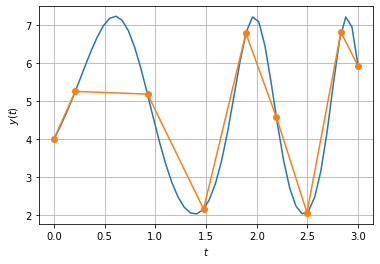

In [ ]:
def RHS2(t, y):
    return (y+1)*(t+1)*np.cos(t**2+2*t)
def an(t,y):
    return 5*np.exp(0.5*np.sin(t**2+t*2))-1
t=np.linspace(0,3,50)
#sol=solve_ivp(RHS2,(0, 3), np.array([4]),method='DOP853')
sol=solve_ivp(RHS2,(0, 3), np.array([4]),t_eval=t,method='DOP853')
ta = np.linspace(0, 3)
ya = an(ta, 4)
plt.figure()
plt.grid()
plt.plot(ta, ya , label='Analytical solution.')
plt.plot(sol.t, sol.y[0], '-o')
plt.ylabel(r'$y(t)$')
plt.xlabel(r'$t$')

# **Scipy Dop853 module solver**

In [ ]:
from scipy.integrate import solve_ivp  #Para usar metodos como DOP853
t=np.linspace(0,3,25)                                                #Se definen los limites de muestra y el numero de intervalos

def RHS2(t, y):
    return -2*t*y                                                    #Planteamiento de ecuación diferencial
sol = solve_ivp(RHS2,(0, 3), np.array([2]),method='DOP853',t_eval=t) #se introduce el metodo DOP853 con limites de 0 a 3 y valor inicial=2


def an(t,y):
  return 2*np.exp(-t**2)                                             #Solución análitica del sistema 

Text(0.5, 0, '$t$')

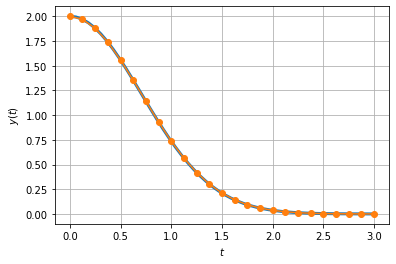

In [ ]:
ta = np.linspace(0,3)
ya = an(ta, 4)
plt.figure()  #Se grafican las funciones 
plt.plot(ta, ya , linewidth=3.0,label='Analytical solution.')
plt.plot(sol.t, sol.y[0], '-o')
plt.grid()
plt.ylabel(r'$y(t)$')
plt.xlabel(r'$t$')

El tamaño de paso es: 0.1


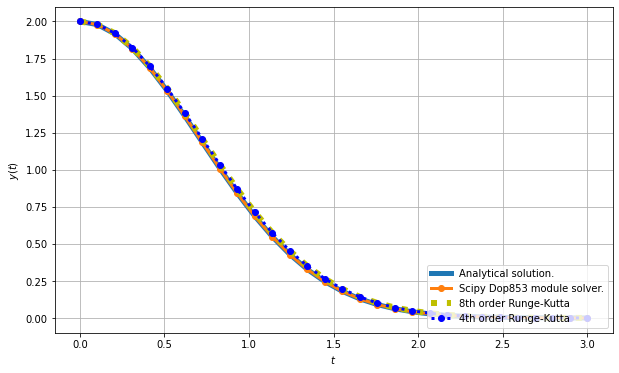

In [ ]:
t0=0.0                         #Tiempo inicial
tN=3.0                         #Tiempo final
N=30                           #Numero de intervalos
t=np.linspace(t0,tN,N) 
x_8RK=np.zeros(N)              #Se crea una matriz de ceros para Runge-Kutta de orden 8
h=(tN-t0)/N                    #Se establece el tamaño de paso
x_8RK[0]=2                     # Condición inicial del sistema 
x_4RK = np.zeros(N)            #Se crea una matriz de ceros para Runge-Kutta de orden 4
x_4RK[0]=2                     #Condición inicial del sistema
print('El tamaño de paso es:',h)


def RHS2(t, y):
    return -2*t*y
sol = solve_ivp(RHS2,(0, 3), np.array([2]),method='DOP853',t_eval=t)  #se aplica la solución por el metodo DOP853 con limites de 0 a 3 y valor inicial=2

def an(t,y):
  return 2*np.exp(-t**2) #Se define la solución análitica del sistema
  
def g(t,y):
  return -2*t*y #Se define la función del sistema para el metodo Runge Kutta de grado 4 y 8

for n in range(0,N-1):  #Iteraciones para el Runge Kutta de grado 4
    k1 = h*g( x_4RK[n]       , t[n]         )
    k2 = h*g( x_4RK[n] + k1/2, t[n] + (h/2) ) 
    k3 = h*g( x_4RK[n] + k2/2, t[n] + (h/2) ) 
    k4 = h*g( x_4RK[n] + k3  , t[n] +  h    )
    
    x_4RK[n+1] = x_4RK[n] + k1/6 + k2/3 + k3/3 + k4/6 #Solución del sistema

for n in range(0,N-1):  #Iteraciones para el Runge Kutta de grado 8
    k1=g(x_8RK[n],t[n])
    k2=g(x_8RK[n]+(h*4/27)*k1,t[n]+(h*(4/27))) 
    k3=g(x_8RK[n]+(h/18)*(k1+(3*k2)),t[n]+(h*(2/9))) 
    k4=g(x_8RK[n]+(h/12)*(k1+(3*k3)),t[n]+(h*(1/3)))
    k5=g(x_8RK[n]+(h/8)*(k1+(3*k4)),t[n]+(h*(1/2)))
    k6=g(x_8RK[n]+(h/54)*((13*k1)-(27*k3)+(42*k4)+(8*k5)),t[n]+(h*(2/3)))
    k7=g(x_8RK[n]+(h/4320)*((389*k1)-(54*k3)+(966*k4)-(824*k5)+(243*k6)),t[n]+(h*(1/6)))
    k8=g(x_8RK[n]+(h/20)*((-234*k1)+(81*k3)-(1164*k4)+(656*k5)-(122*k6)+(800*k7)),t[n]+h)
    k9=g(x_8RK[n]+(h/288)*((-127*k1)+(18*k3)-(678*k4)+(456*k5)-(9*k6)+(576*k7)+(4*k8)),t[n]+(h*(5/6)))
    k10=g(x_8RK[n]+(h/820)*((1481*k1)-(81*k3)+(7104*k4)-(3376*k5)+(72*k6)-(5040*k7)-(60*k8)+(720*k9)),t[n]+h)
    
    x_8RK[n+1] = x_8RK[n] + (h/840)*(k1*41 + 27*k4 +272*k5 +27*k6+216*k7+216*k9+41*k10) #Solución del sistema

ta = np.linspace(0, 3)
ya = an(t, 4)
#A continuación se grafican todas las soluciones usando diferentes metodos de solución
plt.figure(figsize=(10,6))
plt.plot(t, ya ,linewidth=5.0,  label='Analytical solution.')
plt.plot(sol.t, sol.y[0], '-o',linewidth=3.0,label='Scipy Dop853 module solver.')
plt.plot(t,x_8RK,':y' , linewidth=6.0, label=r'8th order Runge-Kutta')
plt.plot(t,x_4RK,':bo' , linewidth=3.0,label=r'4th order Runge-Kutta')
plt.ylabel(r'$y(t)$')
plt.xlabel(r'$t$')
plt.grid()
plt.legend(loc=4) 

**This would be the analytical solution for the first iteration**


$$\frac{dy}{dx}=-2xy$$

Solution:

\begin{align}
k_1 &=  g(x_n, t_n) \\[1.0em]
k_1 &=  g(0, 2) \\[1.0em]
k_1 & = -2(0)(2)=0 \\[1.0em]
k_1 & =0
\\[1.0em]
\\[1.0em]
k_2 &= g(x_n + a_{2,1}k_1 h , t+c_2 h ) \\[1.0em]
k_2 &= g(0 +  \frac{4}{27}(0.1)(0) , 2+\frac{4}{27}0.1 ) \\[1.0em]
k_2 &= g(0, 2.0148 ) \\[1.0em]
k_2 &=  -2(0)(2.0148) \\[1.0em]
k_2 & = 0
\\[1.0em]
\\[1.0em]
k_3 &= g(x_n + h(a_{3,1}k_1 + a_{3,2}k_2), t+c_3h ) \\[1.0em]
k_3 &= g(0 + \frac{0.1}{18}(0 + 3(0)), 2+0.1\frac{2}{9} ) \\[1.0em]
k_3 &= g(0, 2.0222 ) \\[1.0em]
k_3 &= -2(0)(2.0222)=0\\[1.0em]
k_3 &= 0
\\[1.0em]
\\[1.0em]
k_4 &= 0 
\\[1.0em]
k_5 &= 0 
\\[1.0em]
k_6 &= 0 
\\[1.0em]
k_7 &= 0 
\\[1.0em]
k_8 &= 0
\\[1.0em]
k_9 &= 0
\\[1.0em]
k_{10} &= 0
\\[1.0em]
k_{8RK} &= g(x_n + \frac{h}{840}(41*k_1 + 27*k_4 +272*k_5 +27*k_6 + 216*k_7+ 216*k_9+41*k_10)\\[1.0em]
k_{8RK} &= g(0+ \frac{h}{840}(41*0+ 27*0 +272*0 +27*0 + 216*0 + 216*k0+41*0)\\[1.0em]
k_{8RK} &= 0\\[1.0em]
\end{align}









# **Aplication**
The Folowing section shows how to aplay the method 'DOP853' for some equations sistems such lotka-volterra sistem and the lorenz aractors sistem


## Lotka volterra

In [ ]:
def lotka_volterra(t, x):
    #Defienen los parametros del sistema 
    X = x[0]
    Y = x[1]
    #Se asignan las ecuacione que representan el sistema
    dxdt = a*X - b*X*Y
    dydt = g*X*Y - d*Y

    #Esta función retorna un vector [fx, fy]
    return [dxdt, dydt]

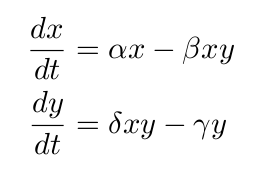

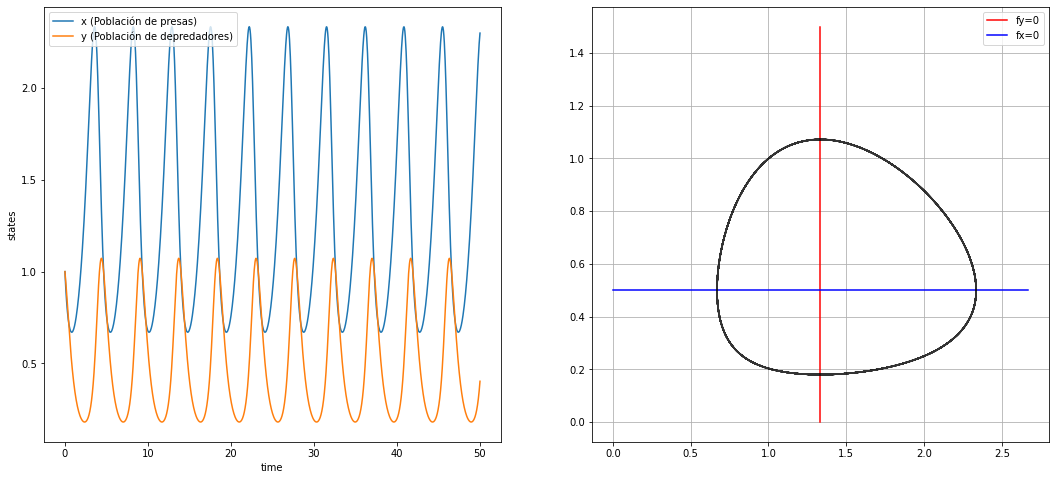

In [ ]:
#Se definen los parametros para el sistema 
a = 1
b = 2
g = 1.5
d = 2


y0 = [1, 1] #Estado inicial 
#Resolvemos la EDO usando el metodo DOP853
sol = solve_ivp(lotka_volterra, y0=y0, t_span=[0, 50],method='DOP853', t_eval=np.linspace(0,50, num=1001))
#Se almacena la solución 
s = pd.DataFrame(np.transpose(sol.y), columns=['x', 'y'])
s['time'] = sol.t

# Parametros para plotear la solución
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))

# plot timecourse
ax1.plot(s.time, s.x, label='x (Población de presas)')
ax1.plot(s.time, s.y, label='y (Población de depredadores)')

ax1.set_xlabel('time')
ax1.set_ylabel('states')
ax1.legend(loc='upper left')
ax2.plot([d/g, d/g],[0, 3*a/b],'r-', label="fy=0")
ax2.plot([0, 2*d/g],[a/b, a/b],'b-', label="fx=0")
ax2.plot(s.x, s.y, 'k', alpha=0.8)
plt.grid()
ax2.legend()
plt.show()

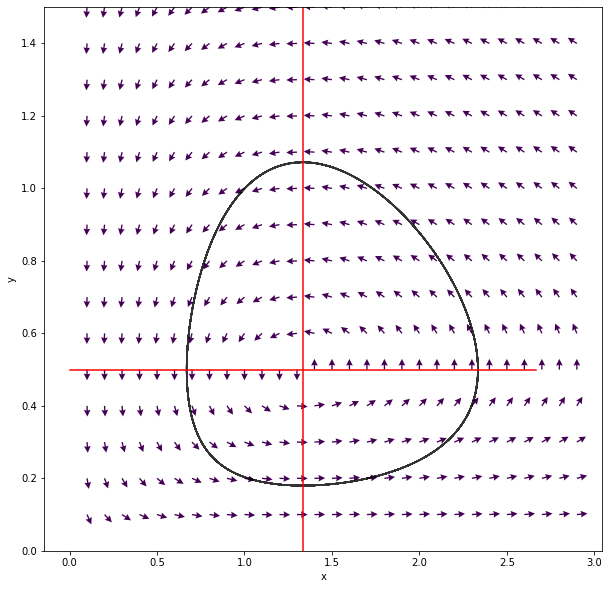

In [ ]:
#Calculamos el campo verctorial de la derivada alrededor de la solución

y0 = [1.0, 1.0]
sol = solve_ivp(lotka_volterra, y0=y0, t_span=[0, 50], method='DOP853',t_eval=np.linspace(0,50, num=1001))
# store solution in dataframe
s = pd.DataFrame(np.transpose(sol.y), columns=['x', 'y'])
s['time'] = sol.t

x = np.arange(0.1,3,0.1); y = np.arange(0.1,3,0.1)
[xg,yg] = np.meshgrid(x,y)
n = np.size(x); m = np.size(x)
u = np.zeros([n,m])
v = np.zeros([n,m])

for i in range(n):
    for j in range(m):
        df = lotka_volterra(1, [xg[i,j],yg[i,j]])
        df = df/np.linalg.norm(df)
        u[i,j] = df[0]
        v[i,j] = df[1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

h = ax.quiver(xg,yg,u,v,0.5, headwidth=5)
ax.plot(s.x, s.y, 'k-', alpha=0.8)
ax.plot([d/g, d/g],[0, 3*a/b],'r-')
ax.plot([0, 2*d/g],[a/b, a/b],'r-')
ax.set_ylim(0, 1.5)
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.show()

## Atractor de Lorenz

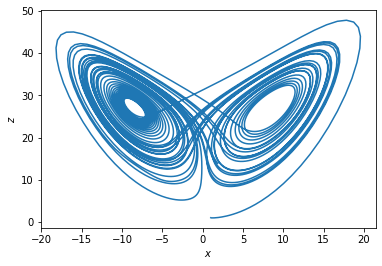

In [ ]:
    from scipy import linspace
    import numpy as np 
    from scipy.integrate import solve_ivp
    import matplotlib.pyplot as plt

    #plt.style.use(['dark_background'])
    def lorenz(t, xyz):
        x, y, z = xyz
        s, r, b = 10, 28, 8/3. # parameters Lorentz used
        return [s*(y-x), x*(r-z) - y, x*y - b*z]

    a, b = 0, 40
    #t = linspace(a, b, 4000)
    t = np.linspace(a, b, 4000)

    sol1 = solve_ivp(lorenz, [a, b], [1,1,1],method='DOP853', t_eval=t)

    plt.plot(sol1.y[0], sol1.y[2])
    plt.xlabel("$x$")
    plt.ylabel("$z$")
    plt.show()

    

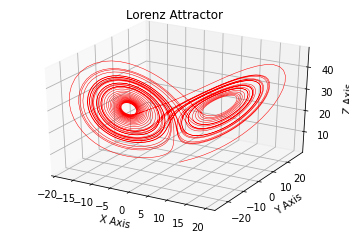

In [ ]:

sol1 = solve_ivp(lorenz, [a, b], [1,1,1],method='DOP853', t_eval=t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot(sol1.y[0], sol1.y[1],sol1.y[2],'r' ,lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")
plt.show()